## MLB Project - Gustavo Wallis

Baseball is a sport in which games are either won or lost (there are no ties). To win the game one must score more runs than the opposing team. In this project, and with the use of a regression model, we focus on the offensive side of baseball, and seek to determine which statistics can be used to predict how many runs a team will score in a season.

### 1) Prepare Problem

#### 1.a) Load Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import time

# Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#For Linear Regression and testing
import statsmodels.api as sm
from statsmodels.api import add_constant
from sklearn.model_selection import train_test_split
import itertools
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### 1.b) Load Datasets

In [2]:
#To see the entire table
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv(r'C:\Users\gusta\Downloads\mlb_teams.csv')
df.head()

,TeamName,RA/G,DefEff,E,DP,W,L,W-L%,ERA,tSho,H,ER,HR,BB,SO,R/G,R,H 1,RBI,SB,SO 1,BA,OBP,SLG,GDP,LOB,salary,WAR
0,2018 ARI,3.98,0.698,75,152,82,80,0.506,3.72,9,1313,605,174,522,1448,4.28,693,1283,658,79,1460,0.235,0.310,0.397,110,1086,143324597,34.1
1,2018 ATL,4.06,0.709,80,134,90,72,0.556,3.75,11,1236,607,153,635,1423,4.69,759,1433,717,90,1290,0.257,0.324,0.417,99,1143,130649395,40.8
2,2018 BAL,5.51,0.674,104,159,47,115,0.290,5.18,7,1552,824,234,589,1203,3.84,622,1317,593,81,1412,0.239,0.298,0.391,132,1027,127633703,11.4
3,2018 BOS,3.99,0.693,77,106,108,54,0.667,3.75,14,1305,608,176,512,1558,5.41,876,1509,829,125,1253,0.268,0.339,0.453,130,1124,227398860,56.5
4,2018 CHC,3.96,0.700,104,155,95,68,0.583,3.65,18,1319,598,157,622,1333,4.67,761,1453,722,66,1388,0.258,0.333,0.410,107,1224,194259933,45.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TeamName  210 non-null    object 
 1   RA/G      210 non-null    float64
 2   DefEff    210 non-null    float64
 3   E         210 non-null    int64  
 4   DP        210 non-null    int64  
 5   W         210 non-null    int64  
 6   L         210 non-null    int64  
 7   W-L%      210 non-null    float64
 8   ERA       210 non-null    float64
 9   tSho      210 non-null    int64  
 10  H         210 non-null    int64  
 11  ER        210 non-null    int64  
 12  HR        210 non-null    int64  
 13  BB        210 non-null    int64  
 14  SO        210 non-null    int64  
 15  R/G       210 non-null    float64
 16  R         210 non-null    int64  
 17  H 1       210 non-null    int64  
 18  RBI       210 non-null    int64  
 19  SB        210 non-null    int64  
 20  SO 1      210 non-null    int64 

In [5]:
#To avoid confusion, we rename variables to differentiate offensive from defensive stats. 
df.rename(columns={'DP':'DPA','H':'HA','HR':'HRA','BB':'BBA','SO':'SOA','H 1':'H','SO 1':'SO'}, inplace=True)
df.head()

,TeamName,RA/G,DefEff,E,DPA,W,L,W-L%,ERA,tSho,HA,ER,HRA,BBA,SOA,R/G,R,H,RBI,SB,SO,BA,OBP,SLG,GDP,LOB,salary,WAR
0,2018 ARI,3.98,0.698,75,152,82,80,0.506,3.72,9,1313,605,174,522,1448,4.28,693,1283,658,79,1460,0.235,0.310,0.397,110,1086,143324597,34.1
1,2018 ATL,4.06,0.709,80,134,90,72,0.556,3.75,11,1236,607,153,635,1423,4.69,759,1433,717,90,1290,0.257,0.324,0.417,99,1143,130649395,40.8
2,2018 BAL,5.51,0.674,104,159,47,115,0.290,5.18,7,1552,824,234,589,1203,3.84,622,1317,593,81,1412,0.239,0.298,0.391,132,1027,127633703,11.4
3,2018 BOS,3.99,0.693,77,106,108,54,0.667,3.75,14,1305,608,176,512,1558,5.41,876,1509,829,125,1253,0.268,0.339,0.453,130,1124,227398860,56.5
4,2018 CHC,3.96,0.700,104,155,95,68,0.583,3.65,18,1319,598,157,622,1333,4.67,761,1453,722,66,1388,0.258,0.333,0.410,107,1224,194259933,45.0


In [6]:
# Dropping null value columns to avoid errors
df.dropna(inplace = True)

# We split column 'TeamName', since it contains both the year and team name abbreviation.
team = df["TeamName"].str.split(" ", n = 1, expand = True)

# Making separate first name column from new dataframe
df["Year"]= team[0]
  
# Making separate last name column from new dataframe
df["Team"]= team[1]
  
# Dropping "TeamName" column
df.drop(columns =["TeamName"], inplace = True)
  
# df display
df.head(1)

,RA/G,DefEff,E,DPA,W,L,W-L%,ERA,tSho,HA,ER,HRA,BBA,SOA,R/G,R,H,RBI,SB,SO,BA,OBP,SLG,GDP,LOB,salary,WAR,Year,Team
0,3.98,0.698,75,152,82,80,0.506,3.72,9,1313,605,174,522,1448,4.28,693,1283,658,79,1460,0.235,0.31,0.397,110,1086,143324597,34.1,2018,ARI


In [7]:
#Since 'Year' is stored as an object, we convert it to an integer. 
df = df.astype({"Year": 'int64'})

Since the first Dataframe (mlb_teams) uploaded does not contain certain offensive statistics that are important, we proceed to import another file that has more information.

In [8]:
df1 = pd.read_csv(r'C:\Users\gusta\OneDrive\Documents\Teams.csv')

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          2955 non-null   int64  
 1   lgID            2905 non-null   object 
 2   teamID          2955 non-null   object 
 3   franchID        2955 non-null   object 
 4   divID           1438 non-null   object 
 5   Rank            2955 non-null   int64  
 6   G               2955 non-null   int64  
 7   Ghome           2556 non-null   float64
 8   W               2955 non-null   int64  
 9   L               2955 non-null   int64  
 10  DivWin          1410 non-null   object 
 11  WCWin           774 non-null    object 
 12  LgWin           2927 non-null   object 
 13  WSWin           2598 non-null   object 
 14  R               2955 non-null   int64  
 15  AB              2955 non-null   int64  
 16  H               2955 non-null   int64  
 17  2B              2955 non-null   i

In [10]:
#Check that the data matches with the first df
df1.loc[(df1['yearID'] == 2018) & (df1['teamIDBR'] == 'ARI')]

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2865,2018,NL,ARI,ARI,W,3,162,81.0,82,80,N,N,N,N,693,5460,1283,259,50,176,560.0,1460.0,79.0,25.0,52.0,45.0,644,605,3.72,2,9,39,4389,1313,174,522,1448,75,152,0.988,Arizona Diamondbacks,Chase Field,2242695.0,108,107,ARI,ARI,ARI


In [11]:
#From df1, we select the stats that we are interested in analyzing
df2=df1[['yearID','teamIDBR','2B','3B','HR','BB','FP','BPF','SF','CS', 'RA']]
df2.head()

,yearID,teamIDBR,2B,3B,HR,BB,FP,BPF,SF,CS,RA
0,1871,BOS,70,37,3,60.0,0.834,103,NaN,16.0,303
1,1871,CHI,52,21,10,60.0,0.829,104,NaN,21.0,241
2,1871,CLE,35,40,7,26.0,0.818,96,NaN,8.0,341
3,1871,KEK,19,8,2,33.0,0.803,101,NaN,4.0,243
4,1871,NYU,43,21,1,33.0,0.840,90,NaN,15.0,313


In [12]:
#Merged dataframes using a left join
df_final = pd.merge(df, df2,  how='left', left_on=['Team','Year'], right_on=['teamIDBR','yearID'])
df_final.head()

,RA/G,DefEff,E,DPA,W,L,W-L%,ERA,tSho,HA,ER,HRA,BBA,SOA,R/G,R,H,RBI,SB,SO,BA,OBP,SLG,GDP,LOB,salary,WAR,Year,Team,yearID,teamIDBR,2B,3B,HR,BB,FP,BPF,SF,CS,RA
0,3.98,0.698,75,152,82,80,0.506,3.72,9,1313,605,174,522,1448,4.28,693,1283,658,79,1460,0.235,0.310,0.397,110,1086,143324597,34.1,2018,ARI,2018,ARI,259,50,176,560.0,0.988,108,45.0,25.0,644
1,4.06,0.709,80,134,90,72,0.556,3.75,11,1236,607,153,635,1423,4.69,759,1433,717,90,1290,0.257,0.324,0.417,99,1143,130649395,40.8,2018,ATL,2018,ATL,314,29,175,511.0,0.986,100,43.0,36.0,657
2,5.51,0.674,104,159,47,115,0.290,5.18,7,1552,824,234,589,1203,3.84,622,1317,593,81,1412,0.239,0.298,0.391,132,1027,127633703,11.4,2018,BAL,2018,BAL,242,15,188,422.0,0.982,96,35.0,22.0,892
3,3.99,0.693,77,106,108,54,0.667,3.75,14,1305,608,176,512,1558,5.41,876,1509,829,125,1253,0.268,0.339,0.453,130,1124,227398860,56.5,2018,BOS,2018,BOS,355,31,208,569.0,0.987,104,48.0,31.0,647
4,3.96,0.700,104,155,95,68,0.583,3.65,18,1319,598,157,622,1333,4.67,761,1453,722,66,1388,0.258,0.333,0.410,107,1224,194259933,45.0,2018,CHC,2018,CHC,286,34,167,576.0,0.983,107,46.0,38.0,645


In [13]:
df_final.drop(columns =["yearID","teamIDBR"], inplace = True)
df_final.head()

,RA/G,DefEff,E,DPA,W,L,W-L%,ERA,tSho,HA,ER,HRA,BBA,SOA,R/G,R,H,RBI,SB,SO,BA,OBP,SLG,GDP,LOB,salary,WAR,Year,Team,2B,3B,HR,BB,FP,BPF,SF,CS,RA
0,3.98,0.698,75,152,82,80,0.506,3.72,9,1313,605,174,522,1448,4.28,693,1283,658,79,1460,0.235,0.310,0.397,110,1086,143324597,34.1,2018,ARI,259,50,176,560.0,0.988,108,45.0,25.0,644
1,4.06,0.709,80,134,90,72,0.556,3.75,11,1236,607,153,635,1423,4.69,759,1433,717,90,1290,0.257,0.324,0.417,99,1143,130649395,40.8,2018,ATL,314,29,175,511.0,0.986,100,43.0,36.0,657
2,5.51,0.674,104,159,47,115,0.290,5.18,7,1552,824,234,589,1203,3.84,622,1317,593,81,1412,0.239,0.298,0.391,132,1027,127633703,11.4,2018,BAL,242,15,188,422.0,0.982,96,35.0,22.0,892
3,3.99,0.693,77,106,108,54,0.667,3.75,14,1305,608,176,512,1558,5.41,876,1509,829,125,1253,0.268,0.339,0.453,130,1124,227398860,56.5,2018,BOS,355,31,208,569.0,0.987,104,48.0,31.0,647
4,3.96,0.700,104,155,95,68,0.583,3.65,18,1319,598,157,622,1333,4.67,761,1453,722,66,1388,0.258,0.333,0.410,107,1224,194259933,45.0,2018,CHC,286,34,167,576.0,0.983,107,46.0,38.0,645


In [14]:
#For the regression, we create a new column with the log of the salary.
df_final['salary_log'] = np.log(df_final['salary'])
df_final.describe()

,RA/G,DefEff,E,DPA,W,L,W-L%,ERA,tSho,HA,ER,HRA,BBA,SOA,R/G,R,H,RBI,SB,SO,BA,OBP,SLG,GDP,LOB,salary,WAR,Year,2B,3B,HR,BB,FP,BPF,SF,CS,RA,salary_log
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,2.100000e+02,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,4.339810,0.690071,94.971429,143.185714,80.990476,80.990476,0.500005,4.036000,10.390476,1396.980952,648.909524,171.380952,495.452381,1277.695238,4.339952,703.028571,1396.980952,669.395238,89.185714,1277.695238,0.253043,0.318643,0.406390,122.257143,1103.509524,1.260503e+08,33.294762,2015.000000,275.128571,28.580952,171.380952,495.452381,0.984214,100.076190,40.800000,33.976190,703.028571,18.583543
std,0.505359,0.011041,14.544739,17.678110,11.525711,11.498696,0.071063,0.502027,4.011933,84.950983,77.097629,29.610673,55.580539,123.023756,0.430569,69.833220,70.976373,68.351827,28.471068,122.062548,0.010573,0.011500,0.024486,15.437188,50.192952,4.717408e+07,10.833566,2.004779,25.300068,9.263584,35.759532,61.494623,0.002353,5.690074,7.975321,8.566341,81.778960,0.375451
min,3.240000,0.657000,54.000000,95.000000,47.000000,54.000000,0.290000,2.940000,2.000000,1125.000000,478.000000,101.000000,352.000000,943.000000,3.170000,513.000000,1199.000000,485.000000,19.000000,973.000000,0.226000,0.292000,0.335000,88.000000,965.000000,3.556791e+07,7.600000,2012.000000,219.000000,5.000000,95.000000,375.000000,0.978000,88.000000,24.000000,13.000000,525.000000,17.386954
25%,3.980000,0.683000,85.000000,133.000000,73.000000,72.000000,0.451000,3.700000,7.000000,1341.250000,597.250000,152.000000,462.000000,1199.000000,4.010000,650.000000,1346.250000,618.250000,69.000000,1193.250000,0.245000,0.311000,0.389250,112.000000,1069.500000,9.018259e+07,25.125000,2013.000000,257.000000,22.000000,146.000000,449.000000,0.983000,96.000000,35.000000,28.000000,645.250000,18.317332
50%,4.315000,0.690500,95.000000,142.500000,81.000000,81.000000,0.500000,4.000000,10.000000,1394.000000,643.000000,173.000000,491.000000,1258.000000,4.315000,700.000000,1394.500000,665.000000,88.000000,1277.500000,0.252500,0.318500,0.406000,121.000000,1104.000000,1.156042e+08,33.300000,2015.000000,274.000000,29.000000,168.500000,492.500000,0.984000,100.000000,40.000000,34.000000,699.500000,18.565683
75%,4.677500,0.698000,105.000000,155.000000,90.000000,89.000000,0.556000,4.360000,13.000000,1451.750000,700.000000,190.000000,528.500000,1351.750000,4.630000,750.000000,1446.000000,713.750000,107.500000,1360.000000,0.259750,0.326000,0.424000,133.000000,1136.500000,1.524056e+08,41.050000,2017.000000,290.000000,34.000000,198.000000,539.750000,0.986000,103.000000,45.000000,39.000000,757.750000,18.842056
max,5.520000,0.728000,136.000000,190.000000,108.000000,115.000000,0.667000,5.360000,23.000000,1637.000000,846.000000,258.000000,653.000000,1687.000000,5.530000,896.000000,1625.000000,854.000000,181.000000,1594.000000,0.283000,0.349000,0.478000,160.000000,1250.000000,3.017351e+08,61.200000,2018.000000,363.000000,57.000000,267.000000,656.000000,0.991000,120.000000,64.000000,61.000000,894.000000,19.525060


### 2) Summarize Data

#### 2.a) Descriptive Statistics

In [15]:
df_final.shape

(210, 39)

Our final dataset has 210 rows and 39 columns. It contains data from 2012 to 2018, for each of the 30 teams playing in the MLB.

In [16]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 209
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RA/G        210 non-null    float64
 1   DefEff      210 non-null    float64
 2   E           210 non-null    int64  
 3   DPA         210 non-null    int64  
 4   W           210 non-null    int64  
 5   L           210 non-null    int64  
 6   W-L%        210 non-null    float64
 7   ERA         210 non-null    float64
 8   tSho        210 non-null    int64  
 9   HA          210 non-null    int64  
 10  ER          210 non-null    int64  
 11  HRA         210 non-null    int64  
 12  BBA         210 non-null    int64  
 13  SOA         210 non-null    int64  
 14  R/G         210 non-null    float64
 15  R           210 non-null    int64  
 16  H           210 non-null    int64  
 17  RBI         210 non-null    int64  
 18  SB          210 non-null    int64  
 19  SO          210 non-null    i

Below are some statistics that we can gather from the dataset:

In [17]:
df_final.describe()

,RA/G,DefEff,E,DPA,W,L,W-L%,ERA,tSho,HA,ER,HRA,BBA,SOA,R/G,R,H,RBI,SB,SO,BA,OBP,SLG,GDP,LOB,salary,WAR,Year,2B,3B,HR,BB,FP,BPF,SF,CS,RA,salary_log
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,2.100000e+02,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,4.339810,0.690071,94.971429,143.185714,80.990476,80.990476,0.500005,4.036000,10.390476,1396.980952,648.909524,171.380952,495.452381,1277.695238,4.339952,703.028571,1396.980952,669.395238,89.185714,1277.695238,0.253043,0.318643,0.406390,122.257143,1103.509524,1.260503e+08,33.294762,2015.000000,275.128571,28.580952,171.380952,495.452381,0.984214,100.076190,40.800000,33.976190,703.028571,18.583543
std,0.505359,0.011041,14.544739,17.678110,11.525711,11.498696,0.071063,0.502027,4.011933,84.950983,77.097629,29.610673,55.580539,123.023756,0.430569,69.833220,70.976373,68.351827,28.471068,122.062548,0.010573,0.011500,0.024486,15.437188,50.192952,4.717408e+07,10.833566,2.004779,25.300068,9.263584,35.759532,61.494623,0.002353,5.690074,7.975321,8.566341,81.778960,0.375451
min,3.240000,0.657000,54.000000,95.000000,47.000000,54.000000,0.290000,2.940000,2.000000,1125.000000,478.000000,101.000000,352.000000,943.000000,3.170000,513.000000,1199.000000,485.000000,19.000000,973.000000,0.226000,0.292000,0.335000,88.000000,965.000000,3.556791e+07,7.600000,2012.000000,219.000000,5.000000,95.000000,375.000000,0.978000,88.000000,24.000000,13.000000,525.000000,17.386954
25%,3.980000,0.683000,85.000000,133.000000,73.000000,72.000000,0.451000,3.700000,7.000000,1341.250000,597.250000,152.000000,462.000000,1199.000000,4.010000,650.000000,1346.250000,618.250000,69.000000,1193.250000,0.245000,0.311000,0.389250,112.000000,1069.500000,9.018259e+07,25.125000,2013.000000,257.000000,22.000000,146.000000,449.000000,0.983000,96.000000,35.000000,28.000000,645.250000,18.317332
50%,4.315000,0.690500,95.000000,142.500000,81.000000,81.000000,0.500000,4.000000,10.000000,1394.000000,643.000000,173.000000,491.000000,1258.000000,4.315000,700.000000,1394.500000,665.000000,88.000000,1277.500000,0.252500,0.318500,0.406000,121.000000,1104.000000,1.156042e+08,33.300000,2015.000000,274.000000,29.000000,168.500000,492.500000,0.984000,100.000000,40.000000,34.000000,699.500000,18.565683
75%,4.677500,0.698000,105.000000,155.000000,90.000000,89.000000,0.556000,4.360000,13.000000,1451.750000,700.000000,190.000000,528.500000,1351.750000,4.630000,750.000000,1446.000000,713.750000,107.500000,1360.000000,0.259750,0.326000,0.424000,133.000000,1136.500000,1.524056e+08,41.050000,2017.000000,290.000000,34.000000,198.000000,539.750000,0.986000,103.000000,45.000000,39.000000,757.750000,18.842056
max,5.520000,0.728000,136.000000,190.000000,108.000000,115.000000,0.667000,5.360000,23.000000,1637.000000,846.000000,258.000000,653.000000,1687.000000,5.530000,896.000000,1625.000000,854.000000,181.000000,1594.000000,0.283000,0.349000,0.478000,160.000000,1250.000000,3.017351e+08,61.200000,2018.000000,363.000000,57.000000,267.000000,656.000000,0.991000,120.000000,64.000000,61.000000,894.000000,19.525060


In [18]:
df_final.head().style.background_gradient(cmap='Dark2_r')
                                      

,RA/G,DefEff,E,DPA,W,L,W-L%,ERA,tSho,HA,ER,HRA,BBA,SOA,R/G,R,H,RBI,SB,SO,BA,OBP,SLG,GDP,LOB,salary,WAR,Year,Team,2B,3B,HR,BB,FP,BPF,SF,CS,RA,salary_log
0,3.980000,0.698000,75,152,82,80,0.506000,3.720000,9,1313,605,174,522,1448,4.280000,693,1283,658,79,1460,0.235000,0.310000,0.397000,110,1086,143324597,34.100000,2018,ARI,259,50,176,560.000000,0.988000,108,45.000000,25.000000,644,18.780623
1,4.060000,0.709000,80,134,90,72,0.556000,3.750000,11,1236,607,153,635,1423,4.690000,759,1433,717,90,1290,0.257000,0.324000,0.417000,99,1143,130649395,40.800000,2018,ATL,314,29,175,511.000000,0.986000,100,43.000000,36.000000,657,18.688028
2,5.510000,0.674000,104,159,47,115,0.290000,5.180000,7,1552,824,234,589,1203,3.840000,622,1317,593,81,1412,0.239000,0.298000,0.391000,132,1027,127633703,11.400000,2018,BAL,242,15,188,422.000000,0.982000,96,35.000000,22.000000,892,18.664675
3,3.990000,0.693000,77,106,108,54,0.667000,3.750000,14,1305,608,176,512,1558,5.410000,876,1509,829,125,1253,0.268000,0.339000,0.453000,130,1124,227398860,56.500000,2018,BOS,355,31,208,569.000000,0.987000,104,48.000000,31.000000,647,19.242216
4,3.960000,0.700000,104,155,95,68,0.583000,3.650000,18,1319,598,157,622,1333,4.670000,761,1453,722,66,1388,0.258000,0.333000,0.410000,107,1224,194259933,45.000000,2018,CHC,286,34,167,576.000000,0.983000,107,46.000000,38.000000,645,19.084708


In [19]:
#Average stats per season
result = df_final.groupby('Year').mean()
result

,RA/G,DefEff,E,DPA,W,L,W-L%,ERA,tSho,HA,ER,HRA,BBA,SOA,R/G,R,H,RBI,SB,SO,BA,OBP,SLG,GDP,LOB,salary,WAR,2B,3B,HR,BB,FP,BPF,SF,CS,RA,salary_log
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012,4.324667,0.691500,100.300000,142.466667,81.000000,81.000000,0.500000,4.009333,10.333333,1402.100000,643.366667,164.466667,490.300000,1214.200000,4.324000,700.566667,1402.100000,666.600000,107.633333,1214.200000,0.254400,0.319000,0.405200,120.466667,1103.133333,1.077166e+08,33.330000,275.366667,30.900000,164.466667,490.300000,0.983433,99.933333,40.766667,37.866667,700.566667,18.434744
2013,4.165333,0.692167,91.566667,145.200000,81.033333,81.033333,0.500033,3.863333,11.033333,1403.100000,624.266667,155.366667,488.000000,1223.666667,4.166000,675.166667,1403.100000,642.366667,89.766667,1223.666667,0.253367,0.317467,0.396333,124.400000,1121.933333,1.108563e+08,33.266667,274.066667,25.733333,155.366667,488.000000,0.984900,100.100000,40.633333,33.566667,675.166667,18.435577
2014,4.066000,0.690033,97.133333,141.000000,81.000000,81.000000,0.500033,3.738000,11.766667,1386.500000,603.566667,139.533333,467.333333,1248.033333,4.064667,658.700000,1386.500000,624.833333,92.133333,1248.033333,0.251100,0.313667,0.386200,120.300000,1110.900000,1.203389e+08,33.273333,271.233333,28.300000,139.533333,467.333333,0.984000,100.100000,42.566667,34.500000,658.700000,18.538378
2015,4.250000,0.689300,94.333333,145.933333,80.966667,80.966667,0.500033,3.956333,11.300000,1403.533333,635.833333,163.633333,469.100000,1248.200000,4.250333,688.233333,1403.533333,655.000000,83.500000,1248.200000,0.254400,0.316667,0.404567,124.633333,1091.933333,1.289490e+08,33.300000,274.733333,31.300000,163.633333,469.100000,0.984500,100.166667,41.066667,35.466667,688.233333,18.614422
2016,4.477667,0.687867,94.500000,144.466667,80.900000,80.900000,0.500033,4.184333,9.200000,1409.200000,670.800000,187.000000,502.933333,1299.400000,4.478333,724.800000,1409.200000,691.500000,84.566667,1299.400000,0.255300,0.321400,0.417300,123.966667,1097.200000,1.341671e+08,33.316667,275.133333,29.100000,187.000000,502.933333,0.984200,100.166667,40.466667,33.366667,724.800000,18.648309
2017,4.646333,0.687900,93.900000,146.833333,81.000000,81.000000,0.499967,4.352667,8.700000,1407.166667,697.033333,203.500000,527.633333,1336.800000,4.646667,752.733333,1407.166667,718.600000,84.233333,1336.800000,0.254900,0.324333,0.425900,126.800000,1098.066667,1.411488e+08,33.273333,279.900000,26.500000,203.500000,527.633333,0.984133,100.000000,38.933333,31.133333,752.733333,18.707310
2018,4.448667,0.691733,93.066667,136.400000,81.033333,81.033333,0.499933,4.148000,10.400000,1367.266667,667.500000,186.166667,522.866667,1373.566667,4.449667,721.000000,1367.266667,686.866667,82.466667,1373.566667,0.247833,0.317967,0.409233,115.233333,1101.400000,1.391755e+08,33.303333,275.466667,28.233333,186.166667,522.866667,0.984333,100.066667,41.166667,31.933333,721.000000,18.706057


In [20]:
#Top 5 teams with most wins, and top 5 teams with fewest wins from 2012-2018
winners = df_final.groupby(by=['Team']).sum().sort_values('W',ascending=False)
print(winners[['W']].head())

losers = df_final.groupby(by=['Team']).sum().sort_values('W',ascending=True)
print(losers[['W']].head())

        W
Team     
LAD   651
WSN   637
STL   632
NYY   626
CLE   613
        W
Team     
MIA   498
CHW   504
PHI   507
MIN   507
SDP   508


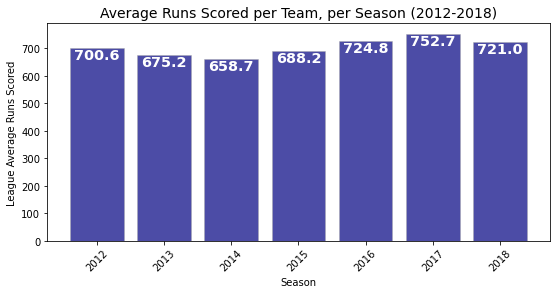

In [21]:
#Plotting average runs scored by all teams in each season.
season_df = df_final.groupby("Year")
lg_avg_r = season_df["R"].mean().round(1).reset_index()
#print(lg_avg_r)

# bar plot
runs = np.array(lg_avg_r["R"])
years = np.array(lg_avg_r["Year"])

fig, ax = plt.subplots(figsize = (9, 4))

plt.bar(years, runs, edgecolor = "darkgrey", color = 'navy', linewidth = 0.6, alpha = 0.7)     

#addlabels(runs,years)
plt.xticks(lg_avg_r["Year"], rotation = 45)
plt.xlabel("Season")
plt.ylabel("League Average Runs Scored")
plt.title("Average Runs Scored per Team, per Season (2012-2018)", fontsize = 14)

#adding data labels to each column
for i, v in enumerate(runs):
    plt.text(years[i], v , str(v),ha='center',va='top',fontsize = 'x-large',color='w',fontweight='semibold')
plt.show()

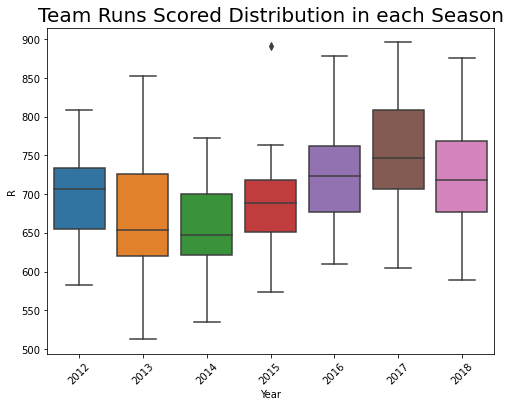

In [22]:
#Plotting runs scored distribution per season
fig, ax = plt.subplots(figsize = (8, 6))

sns.boxplot(x = "Year", y = "R", data = df_final, ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.set_title("Team Runs Scored Distribution in each Season", fontsize = 20)
plt.show()

In [23]:
#Run Differential = Runs Scored - Runs Against
df_final['RD'] = df_final['R']-df_final['RA']

Visualizing the relationship between team wins and run differential.

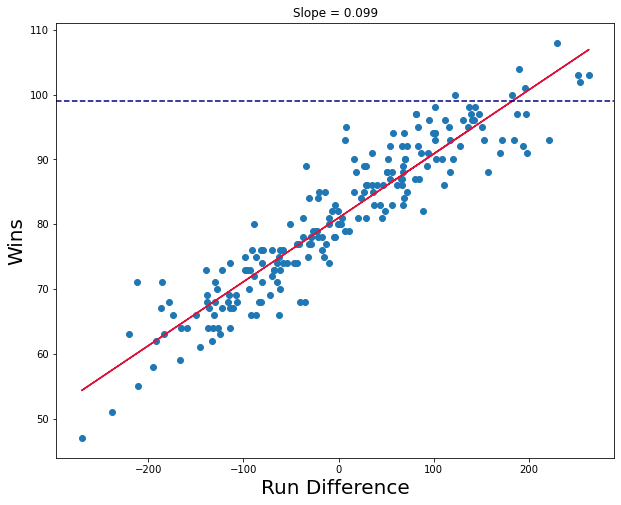

In [24]:
x = np.array(df_final.RD)
y = np.array(df_final.W)
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'crimson')
plt.title("Slope = %s" % round((slope),3), fontsize = 12)
plt.xlabel("Run Difference", fontsize =20)
plt.ylabel("Wins", fontsize = 20)
plt.axhline(99, 0, 1, color = "navy", ls = '--')
plt.show()

Relationship between team wins and runs scored.

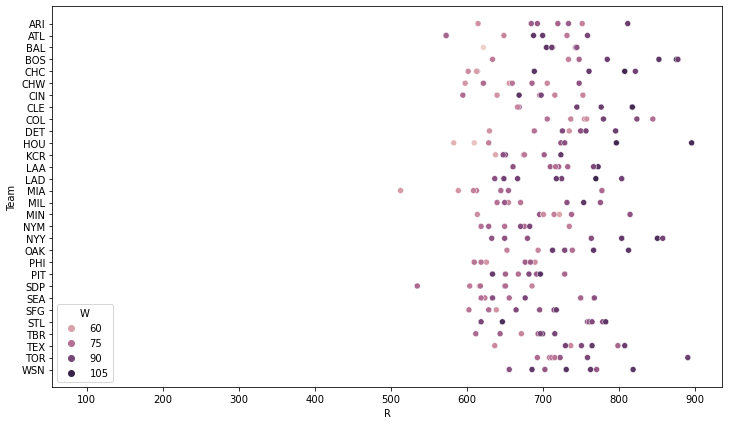

In [25]:
plt.figure(figsize=(12,7))
ax = sns.scatterplot(x="R", y="Team", hue="W",data=df_final,legend='brief')
plt.plot(95,0)

### 3) Prepare Data

#### 3.a) Data Cleaning and Feature Selection

In [26]:
# check for duplicated values
print('Total dataframe size:')
print(df_final.shape)
df_final.duplicated().value_counts()

Total dataframe size:
(210, 40)


False    210
dtype: int64

In [27]:
# check if null values
df_final.isnull().sum()

RA/G          0
DefEff        0
E             0
DPA           0
W             0
L             0
W-L%          0
ERA           0
tSho          0
HA            0
ER            0
HRA           0
BBA           0
SOA           0
R/G           0
R             0
H             0
RBI           0
SB            0
SO            0
BA            0
OBP           0
SLG           0
GDP           0
LOB           0
salary        0
WAR           0
Year          0
Team          0
2B            0
3B            0
HR            0
BB            0
FP            0
BPF           0
SF            0
CS            0
RA            0
salary_log    0
RD            0
dtype: int64

There are no duplicated rows, nor missing values

In [28]:
#Making sure all 30 teams are included
print(df_final.Team.unique())
print(len(df_final.Team.unique()))

['ARI' 'ATL' 'BAL' 'BOS' 'CHC' 'CHW' 'CIN' 'CLE' 'COL' 'DET' 'HOU' 'KCR'
 'LAA' 'LAD' 'MIA' 'MIL' 'MIN' 'NYM' 'NYY' 'OAK' 'PHI' 'PIT' 'SDP' 'SEA'
 'SFG' 'STL' 'TBR' 'TEX' 'TOR' 'WSN']
30


In [29]:
#Running a correlation with runs scored (R), which is the variable we’re interested in predicting. 
df_final.corrwith(df["R"]).sort_values(ascending=False)

R             1.000000
R/G           0.999839
RBI           0.996096
SLG           0.903265
OBP           0.828407
HR            0.694104
RD            0.660466
WAR           0.652707
BA            0.646525
H             0.644667
2B            0.605661
W             0.569679
W-L%          0.569080
BB            0.521056
salary_log    0.391321
SF            0.370351
salary        0.361306
SOA           0.357023
BPF           0.343738
Year          0.289678
HRA           0.255844
LOB           0.198526
FP            0.140331
DefEff        0.099864
GDP           0.082662
ER           -0.004827
ERA          -0.009004
SO           -0.016434
SB           -0.019332
BBA          -0.022260
RA           -0.025407
RA/G         -0.026937
3B           -0.036319
DPA          -0.046909
tSho         -0.050659
E            -0.164530
HA           -0.172764
CS           -0.217808
L            -0.569027
dtype: float64

Since we want to build a model to predict the runs produced by a team in a season, we get rid of the defensive stats, which for obvious reasons have no impact on the offense. On the other hand, we also remove some variables such as R/G (runs per game) and RBI (runs batted in), which basically provide the same information as our dependent variable R (the correlation is close to 1), and therefore wouldn’t add anything to the model.

In [30]:
#Defining the dependent and independent variables, and adding a constant. 
y = df_final.R
X = df_final.drop(['Team','Year','HRA', 'RA/G','DefEff','E','DPA','W','L', 'W-L%','RA/G',
                   'WAR','ERA','tSho','HA','BBA','SOA','ER','FP','R','R/G','RBI','RD','RA'], axis = 1)
X = sm.add_constant(X) 
X.head()

,const,H,SB,SO,BA,OBP,SLG,GDP,LOB,salary,2B,3B,HR,BB,BPF,SF,CS,salary_log
0,1.0,1283,79,1460,0.235,0.310,0.397,110,1086,143324597,259,50,176,560.0,108,45.0,25.0,18.780623
1,1.0,1433,90,1290,0.257,0.324,0.417,99,1143,130649395,314,29,175,511.0,100,43.0,36.0,18.688028
2,1.0,1317,81,1412,0.239,0.298,0.391,132,1027,127633703,242,15,188,422.0,96,35.0,22.0,18.664675
3,1.0,1509,125,1253,0.268,0.339,0.453,130,1124,227398860,355,31,208,569.0,104,48.0,31.0,19.242216
4,1.0,1453,66,1388,0.258,0.333,0.410,107,1224,194259933,286,34,167,576.0,107,46.0,38.0,19.084708


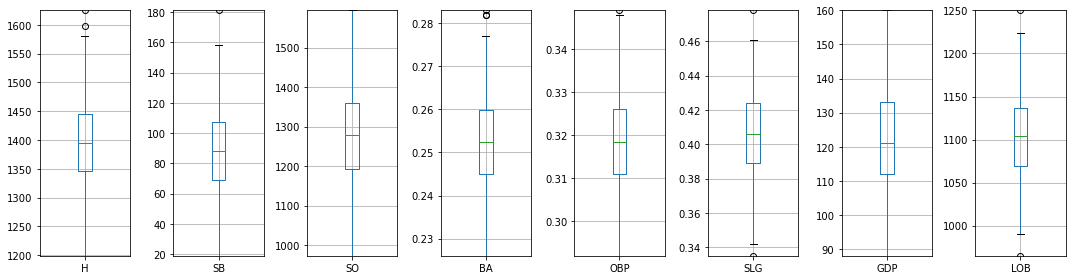

In [31]:
# Boxplots for every independent variable 
selection = ['H', 'SB', 'SO', 'BA', 'OBP', 'SLG', 'GDP', 'LOB']
fig, ax = plt.subplots(1, len(selection), figsize=(15, 4))
i = 0
for col in selection:
    axo = X[col].plot(kind='box', ax=ax[i], showfliers=True, grid=True)
    axo.set_ylim(X[col].min(), X[col].max())
    #axo.set_ylabel(col)
    i += 1

plt.tight_layout()
plt.show()

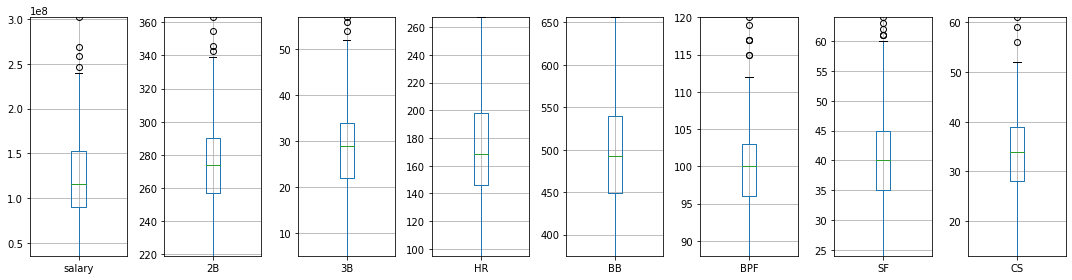

In [32]:
selection = ['salary','2B','3B','HR','BB','BPF','SF','CS']
fig, ax = plt.subplots(1, len(selection), figsize=(15, 4))
i = 0
for col in selection:
    axo = X[col].plot(kind='box', ax=ax[i], showfliers=True, grid=True)
    axo.set_ylim(X[col].min(), X[col].max())
    #axo.set_ylabel(col)
    i += 1

plt.tight_layout()
plt.show()

In [33]:
#Function to determine outliers. In this case, we will be a little more flexible, and allow for values lying outside 2 times the IQR (above or bellow) 
def outliers(data, col_name):
    Q1=np.percentile(np.array(data[col_name].tolist()), 25)
    Q3=np.percentile(np.array(data[col_name].tolist()), 75)
    IQR=Q3-Q1
    LS= Q3 + (2*IQR)
    LI= Q1 - (2*IQR)
    number_outliers = 0
                      
    for value in data[col_name].tolist():
        if (value < LI) | (value > LS):
            number_outliers +=1

    return LS, LI, number_outliers

In [0]:
# s=superior i=inferior n=number of outliers
for column in X[['H', 'SB', 'SO', 'BA', 'OBP', 'SLG', 'GDP','LOB','salary','2B','3B','HR','BB','BPF','SF','CS']]:
    s,i,n = outliers(X, column)
    if n > 0:
        print("{}: {} outliers. The acceptable range is [{} - {}]. ".format(column, n, s, i))

salary: 1 outliers. The acceptable range is [276851547.5 - -34263383.75]. 
2B: 1 outliers. The acceptable range is [356.0 - 191.0]. 
BPF: 2 outliers. The acceptable range is [117.0 - 82.0]. 


In [0]:
#Identifying outliers specifically
print(df_final[['Team','salary', 'Year']].sort_values('salary',ascending=False).head(1))
print(df_final[['Team','2B', 'Year']].sort_values('2B',ascending=False).head(1))
print(df_final[['Team','BPF','Year']].sort_values('BPF',ascending=False).head(2))

    Team     salary  Year
103  LAD  301735080  2015
    Team   2B  Year
153  BOS  363  2013
    Team  BPF  Year
188  COL  120  2012
98   COL  119  2015


When evaluating the four outliers in detail, we decide not to eliminate them, since they are not mistakes. Specifically, the Dodgers (LAD) are historically one of the highest-spending teams per season, so the 2015 salary makes sense. In the case of Boston's number of doubles (2B) in 2013, this data point was confirmed in Baseball Reference. And lastly, it makes sense for Colorado's BPF (Batting Park Factor) to be so high, since Colorado's altitude plus the size of the field make it the most hitter friendly ballpark in MLB.

In [0]:
#We again fin the correlation with runs scored, but without the stats eliminated before.
X.corrwith(df["R"]).sort_values(ascending=False)

Out[38]: SLG           0.903265
OBP           0.828407
HR            0.694104
BA            0.646525
H             0.644667
2B            0.605661
BB            0.521056
salary_log    0.391321
SF            0.370351
salary        0.361306
BPF           0.343738
LOB           0.198526
GDP           0.082662
SO           -0.016434
SB           -0.019332
3B           -0.036319
CS           -0.217808
const              NaN
dtype: float64

In [0]:
#Correlation between all variables, including the dependent variable
df_correl = df_final.drop(['Team','Year','HRA', 'RA/G','DefEff','E','DPA','W','L', 'W-L%','RA/G',
                   'WAR','ERA','tSho','HA','BBA','SOA','ER','FP','R/G','RBI','RD','RA'], axis = 1)
corr = df_correl.corr()

Out[41]: <AxesSubplot:>

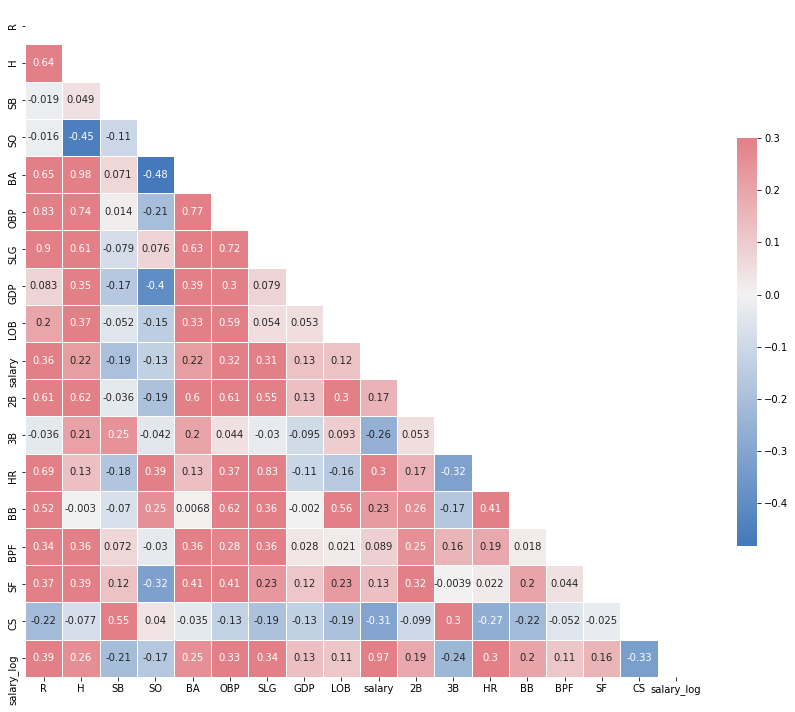

In [0]:
# Correlation heatmap
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### 4. Evaluate Algorithms

#### 4.a) Split-out validation dataset

In [0]:
#Splitting the data into test and training 
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state = 1)
x_train.head()

,const,H,SB,SO,BA,OBP,SLG,GDP,LOB,salary,2B,3B,HR,BB,BPF,SF,CS,salary_log
106,1.0,1349,70,1264,0.247,0.305,0.399,133,993,107981818,277,44,156,439.0,103,41.0,38.0,18.497473
151,1.0,1354,64,1384,0.249,0.321,0.402,119,1132,94947950,247,21,181,542.0,104,35.0,31.0,18.368839
94,1.0,1341,95,1518,0.244,0.321,0.398,101,1165,132993810,272,30,171,567.0,100,35.0,37.0,18.705813
84,1.0,1437,79,1107,0.258,0.329,0.398,120,1188,146536553,280,54,130,572.0,103,46.0,36.0,18.802785
193,1.0,1369,104,1156,0.252,0.317,0.374,139,1112,120784717,269,23,116,481.0,96,38.0,44.0,18.609520


In [0]:
x_train.shape

Out[43]: (168, 18)

In [0]:
y_train.shape

Out[44]: (168,)

In [0]:
x_train.head(2)

,const,H,SB,SO,BA,OBP,SLG,GDP,LOB,salary,2B,3B,HR,BB,BPF,SF,CS,salary_log
106,1.0,1349,70,1264,0.247,0.305,0.399,133,993,107981818,277,44,156,439.0,103,41.0,38.0,18.497473
151,1.0,1354,64,1384,0.249,0.321,0.402,119,1132,94947950,247,21,181,542.0,104,35.0,31.0,18.368839


We define a function that helps us identify the best model containing a given number of predictors, where best is quantified using RSS (residual sum of squares).

In [0]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train,x_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(x_train[list(feature_set)]) - y_train) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [0]:
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(x_train.columns.difference(['const']), k):
        combo=(list(combo)+['const'])
        results.append(processSubset(combo))
     
    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model
    return best_model

In [0]:
#For simplicity, we only try models up to 4 predictors. 
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,5):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 17 models on 1 predictors in 0.06679558753967285 seconds.
Processed 136 models on 2 predictors in 0.5025022029876709 seconds.
Processed 680 models on 3 predictors in 2.7361907958984375 seconds.
Processed 2380 models on 4 predictors in 8.988107442855835 seconds.
Total elapsed time: 12.355865478515625 seconds.


In [0]:
models_best

,RSS,model
1,148598.251818,<statsmodels.regression.linear_model.Regressio...
2,99182.348021,<statsmodels.regression.linear_model.Regressio...
3,89202.830783,<statsmodels.regression.linear_model.Regressio...
4,51583.239177,<statsmodels.regression.linear_model.Regressio...


We print the four models and look at their summaries.

In [0]:
print(models_best.loc[1, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     717.4
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           3.76e-62
Time:                        22:37:38   Log-Likelihood:                -808.32
No. Observations:                 168   AIC:                             1621.
Df Residuals:                     166   BIC:                             1627.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SLG         2565.2537     95.776     26.784      0.0

In [0]:
print(models_best.loc[2, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     575.3
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           4.14e-75
Time:                        22:37:40   Log-Likelihood:                -774.36
No. Observations:                 168   AIC:                             1555.
Df Residuals:                     165   BIC:                             1564.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
OBP         2140.9669    236.130      9.067      0.0

In [0]:
print(models_best.loc[3, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     429.9
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           1.89e-77
Time:                        22:37:41   Log-Likelihood:                -765.46
No. Observations:                 168   AIC:                             1539.
Df Residuals:                     164   BIC:                             1551.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BB             0.9559      0.037     25.591      0.0

In [0]:
print(models_best.loc[4, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     583.9
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           1.84e-95
Time:                        22:37:43   Log-Likelihood:                -719.45
No. Observations:                 168   AIC:                             1449.
Df Residuals:                     163   BIC:                             1465.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BB             0.9772      0.029     34.217      0.0

We create a chart to visualize which model has the highest r-square and which one has the lowest AIC

Out[54]: Text(0, 0.5, 'AIC')

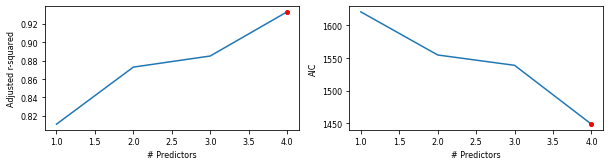

In [0]:
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 8, 'lines.markersize': 4})

# Set up a 2x1 grid so we can look at 2 plots at once
plt.subplot(2, 1,1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 1)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax()+1, rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Adjusted r-squared')

# We'll do the same for AIC, this time looking for the model with the smallest statistic
aic = models_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 2)
plt.plot(aic)
plt.plot(aic.argmin()+1, aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')



#### 4.b) Selecting and testing the model

The model with four predictors seems to be the best one (highest r2 and lowest AIC). It is also important to mention that in this model, the four coefficients are significant at the 0.01 level, as well as the model as a whole. Also, the signs of the four make sense (more hits (H) and walks (BB) produce more runs, while grounding into double play (GDP) and leaving men on base (LOB) decrease the probability of scoring runs).

In [0]:
r2 = models_best.loc[4, "model"].rsquared
print(f'r2: {r2}')

r2: 0.9347682302807488


In [0]:
print(models_best.loc[4, "model"].params)

BB        0.977183
GDP      -1.053382
H         0.962619
LOB      -0.874541
const   -32.251731
dtype: float64


In [0]:
#Retrieving the value of the constant
const = models_best.loc[4, "model"].params['const']

In [0]:
#Retrieving the values of the regression coefficients
BB = models_best.loc[4, "model"].params['BB']
H = models_best.loc[4, "model"].params['H']
LOB = models_best.loc[4, "model"].params['LOB']
GDP = models_best.loc[4, "model"].params['GDP']

In [0]:
x_test.head()

,const,H,SB,SO,BA,OBP,SLG,GDP,LOB,salary,2B,3B,HR,BB,BPF,SF,CS,salary_log
44,1.0,1497,91,1282,0.267,0.331,0.431,119,1130,110765599,271,31,194,486.0,93,41.0,30.0,18.522927
188,1.0,1526,100,1213,0.274,0.330,0.436,132,1111,88210881,306,52,166,450.0,120,39.0,40.0,18.295241
51,1.0,1331,67,1213,0.244,0.318,0.386,120,1129,98203030,249,36,151,519.0,99,28.0,36.0,18.402548
204,1.0,1495,118,1097,0.269,0.327,0.397,114,1171,84439430,287,57,103,483.0,88,61.0,39.0,18.251545
35,1.0,1412,71,1397,0.256,0.314,0.417,124,1055,86382688,256,37,186,401.0,98,33.0,31.0,18.274298


The linear regression model has an equation of the form Y = a + b1X1 + b2X2+....

In [0]:
#With the regression formula, we can test the model by making a prediction using the test data. 
prediction = round(const + x_test['BB']*BB + x_test['H']*H + x_test['LOB']*LOB+ x_test['GDP']*GDP)
print(prediction.head())

44     770.0
188    766.0
51     642.0
204    735.0
35     666.0
dtype: float64


In [0]:
#Calculating the residuals, which are the difference between the actual and the predicted values. 
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': prediction, "Residuals": y_test - prediction})
df_test.head()

,Actual,Predicted,Residuals
44,778,770.0,8.0
188,758,766.0,-8.0
51,668,642.0,26.0
204,718,735.0,-17.0
35,706,666.0,40.0


In [0]:
df_test['Residuals'].std()

Out[65]: 21.24531785542793

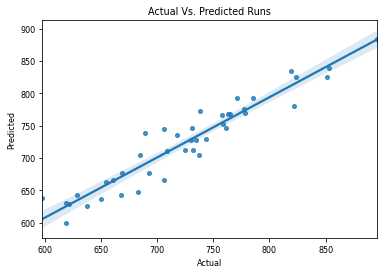

In [0]:
#Prediction Vs. Actual
sns.regplot(x='Actual', y='Predicted', data=df_test, fit_reg=True)
plt.title('Actual Vs. Predicted Runs')
plt.show()

Looking at the scatter plot, and the mean and standard deviation of the residuals, it seems like the model does a fairly good job at predicting the runs scored by a team in any given season. We will now evaluate the model to see if it complies with the basic assumptions of a linear regression.

### 5. Evaluate Linear Regression Assumptions

In this section, we'll test for the fours assumptions associated with a linear regression model.
1. Linearity
2. Normality
3. Homoscedasticity
4. Independence

In [0]:
print(models_best.loc[4, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     583.9
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           1.84e-95
Time:                        22:42:56   Log-Likelihood:                -719.45
No. Observations:                 168   AIC:                             1449.
Df Residuals:                     163   BIC:                             1465.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BB             0.9772      0.029     34.217      0.0

#### 5.a) Linearity

In [0]:
adj_r2 = models_best.loc[4, "model"].rsquared_adj
print(f'r2: {adj_r2}')

r2: 0.9331674506557366


With the "Actual Vs. Predicted Runs" scatter plot, we can see that there is in fact a linear relationship between the predictors and the response variable. Also, at 0.93 the adjusted R-squared shows that the dependent variable is highly explained by the independent variables.

#### 5.b) Normality

The second assumption we'll test for is that the error component is normally distributed. For this we have various methods. First of all, the p-value of the Jarque Bera test (seen in the model summary) indicates that we can't reject the null hypothesis that the data is normally distributed.

In [0]:
#Anderson-Darling test for normality.
threshold = 0.05
p_value_ad = normal_ad(df_test['Residuals'])[1]
if p_value_ad > threshold:
    print(f'Anderson Darling p-value: {p_value_ad}. We cannot reject the null hypothesis: data is normally distributed.')
elif p_value_ad <= threshold:
    print(f'Anderson Darling p-value: {p_value_ad}. We can reject the null hypothesis: data is not normally distributed.')


Anderson Darling p-value: 0.640577461863296. We cannot reject the null hypothesis: data is normally distributed.


In [0]:
#Shapiro-Wilk test for normality.
p_value_sw = sp.stats.shapiro(df_test['Residuals'])[1]
if p_value_sw > threshold:
    print(f'Shapiro-Wilk p-value: {p_value_sw}. We cannot reject the null hypothesis: data is normally distributed.')
elif p_value_sw <= threshold:
    print(f'Shapiro-Wilk p-value: {p_value_sw}. We can reject the null hypothesis: data is not normally distributed.')

Shapiro-Wilk p-value: 0.6355113983154297. We cannot reject the null hypothesis: data is normally distributed.


Out[71]: <Figure size 432x288 with 0 Axes>

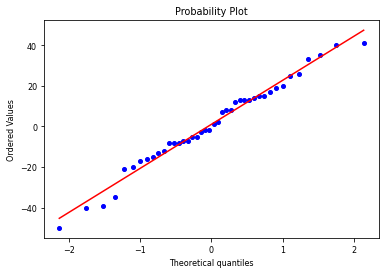

<Figure size 432x288 with 0 Axes>

In [0]:
#Probability Plot
sp.stats.probplot(df_test['Residuals'],plot=plt)
plt.figure()

The closer the data points are to the line, show that there are little departures from normality.

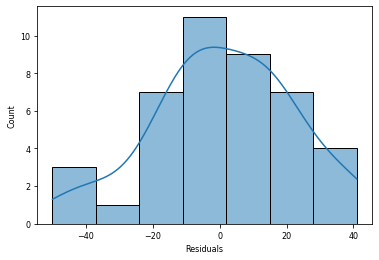

In [0]:
#Histogram of errors 
sns.histplot(df_test['Residuals'], kde=True)
plt.show()

As seen with both the analytical and graphic tests, we can assume that the errors are normally distributed.

Note: all the tests were showed for learning purposes, though it is not necessary to perform all of them.

#### 5.c) Homoscedasticity

Another assumption that we have to check is for homoscedasticity, which refers to a condition in which the variance of the residuals is constant. For this, we'll perform the White test.

In [0]:
homo_test = x_test[['BB','H','LOB','GDP']]
homo_test = add_constant(data=homo_test, prepend=True)
print(homo_test.head())

     const     BB     H   LOB  GDP
44     1.0  486.0  1497  1130  119
188    1.0  450.0  1526  1111  132
51     1.0  519.0  1331  1129  120
204    1.0  483.0  1495  1171  114
35     1.0  401.0  1412  1055  124


In [0]:
white_test = het_white(resid = df_test.Residuals, exog = homo_test)
p_value_wt = white_test[1]
#print('lm:', white_test[0],'lm_pvalue:', white_test[1])

if p_value_wt > threshold:
    print(f'White test p-value: {p_value_wt}. We cannot reject the null hypothesis: the variances for the residuals are equal (Homoscedasticity).')
elif p_value_wt <= threshold:
    print(f'White test p-value: {p_value_wt}. We can reject the null hypothesis: the variances for the residuals are not equal(Heteroskedasticity).')

White test p-value: 0.3294933335263371. We cannot reject the null hypothesis: the variances for the residuals are equal (Homoscedasticity).


#### 5.d) Independence

The Durbin Watson Statistic in the summary (DW: 2.056), indicates that there is no autocorrelation detected in the sample. This makes sense, since we are not dealing with a time series. 
(DW: A value of 2.0 indicates there is no autocorrelation. Values from 0 to less than 2 point to positive autocorrelation, and values from 2 to 4 mean negative autocorrelation).

To test for Multicollinearity, we'll use the variance inflation factor (VIF).  

(A value of 1 means that the predictor is not correlated with other variables. Values of more than 5 are sometimes regarded as being moderate to high, with values of 10 or more being regarded as very high).

In [0]:
#df containing the chosen independent variables
multi = x_test[['BB','H','LOB','GDP']]
multi.head()

,BB,H,LOB,GDP
44,486.0,1497,1130,119
188,450.0,1526,1111,132
51,519.0,1331,1129,120
204,483.0,1495,1171,114
35,401.0,1412,1055,124


In [0]:
#VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(multi.values, i) for i in range(multi.shape[1])]
vif["features"] = multi.columns

In [0]:
vif.round(1)

,VIF Factor,features
0,99.9,BB
1,546.5,H
2,722.6,LOB
3,71.7,GDP


In [0]:
corr = multi.corr()

Out[79]: <AxesSubplot:>

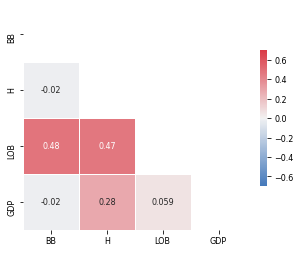

In [0]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap=cmap, vmax=0.7, vmin=-0.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

We can see from the VIF table, that there is strong multicollinearity, even though if we look at the correlation matrix between the four independent variables, there seems to be a low correlation between them. In this case, we will choose to ignore this, because even though there may be a relation between hits (H) and walks (BB), and grounding into double play (GDP) and leaving men on base (LOB), all these stats explain completely different situations of the game. The two variables that could have a stronger relation, which are grounding into double play and leaving men on base (since one leads to the other), is actually one of the least correlated pairs as seen in the heatmap.

## Conclusion

It is important to state that this project has many limitations. For example, we only analyzed 7 years, we just computed models with up to four predictors, there seems to be multicollinearity in the chosen model, among other considerations. With that being said, we can conclude that the combination of Hits (H), Walks (BB), Grounded into Double Play (GDP), and Left on Base (LOB) can be used to predict fairly accurately the runs a team will score in any given season. This also goes in line with the theory behind Moneyball, which considers that getting on base is the main factor that determines run production. In this sense, both Hits and Walks imply getting people on base, while grounding into double plays means the opposite, and leaving men on base means not capitalizing when runners are on base.

## Glossary


**Feature** | **Description** 
---:|:---
**RA/G** | Runs Allowed per Game                             
**DefEff** | Defensive Efficiency 
**E** | Error 
**DPA** | Double Play (Against)  
**W** | Win  
**L** | Loss 
**ERA** | Earned Run Average  
**tSho** | Team Shutouts  
**HA** | Hit (Allowed)  
**ER** | Earned Run  
**HRA** | Home Run (Allowed)  
**BBA** | Walk (Allowed)  
**SOA** | Strikeout (Against)  
**R/G** | Runs Scored per Game  
**R** | Runs Scored 
**H** | Hit 
**RBI** | Runs Batted In  
**SB** | Stolen Base  
**SO** | Strikeout  
**BA** | Batting Average  
**OBP** | On-base Percentage  
**SLG** | Slugging Percentage  
**GDP** | Grounded Into Double Plays  
**LOB** | Left On Base  
**WAR** | Wins Above Replacement  
**2B** | Double 
**3B** | Triple  
**HR** | Home Run  
**BB** | Walk 
**FP** | Fielding Percentage 
**BPF** | Batting Park Factor 
**SF** | Sacrifice Flies 
**CS** | Caught Stealing